In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from functools import partial
from torch.optim.lr_scheduler import OneCycleLR

from engine.data import get_loaders
from engine.model import SimpleMlp, LeNet
from engine.trainer import Trainer
from engine.schedulers import IdentityLR
from engine.utils import device, get_accuracy

In [2]:
train_loader, test_loader = get_loaders("lenet")
model = LeNet().to(device)
trainer = Trainer(IdentityLR)

In [3]:
results = trainer.train(model, train_loader, 30)

  0%|          | 0/30 [00:00<?, ?it/s]/home/zajkoa/projects/studies/msc_1/optimization/optimml/.venv/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/zajkoa/projects/studies/msc_1/optimization/optimml/.venv/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Epoch [30], Step [400], Loss: 1.5958: 100%|██████████| 30/30 [01:40<00:00,  3.35s/it]


In [6]:
print(f"Train accuracy: {get_accuracy(train_loader, model):.3f}")

Train accuracy: 0.857


In [7]:
print(f"Test accuracy: {get_accuracy(test_loader, model):.3f}")

Test accuracy: 0.860


Text(0, 0.5, 'Training loss (Moving average)')

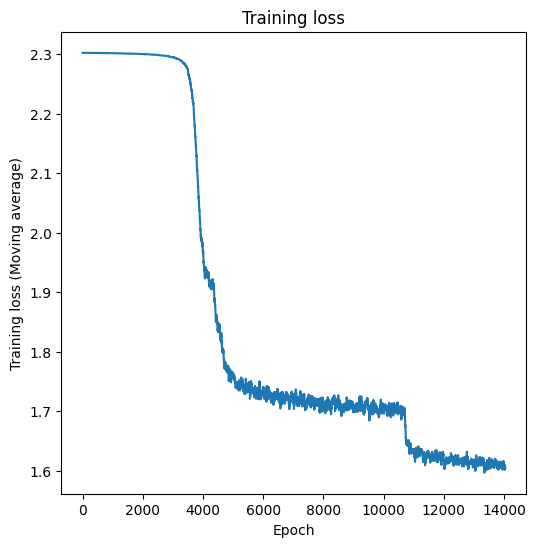

In [8]:
losses = results.losses
fig, ax = plt.subplots(figsize=(6, 6))
ys = [np.mean(losses[i : (i + 30)]) for i in range(len(losses) - 30)]
sns.lineplot(x=list(range(len(ys))), y=ys, ax=ax)
ax.set_title(f"Training loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Training loss (Moving average)")

In [24]:
blocks_indices = [0, 2, 4]

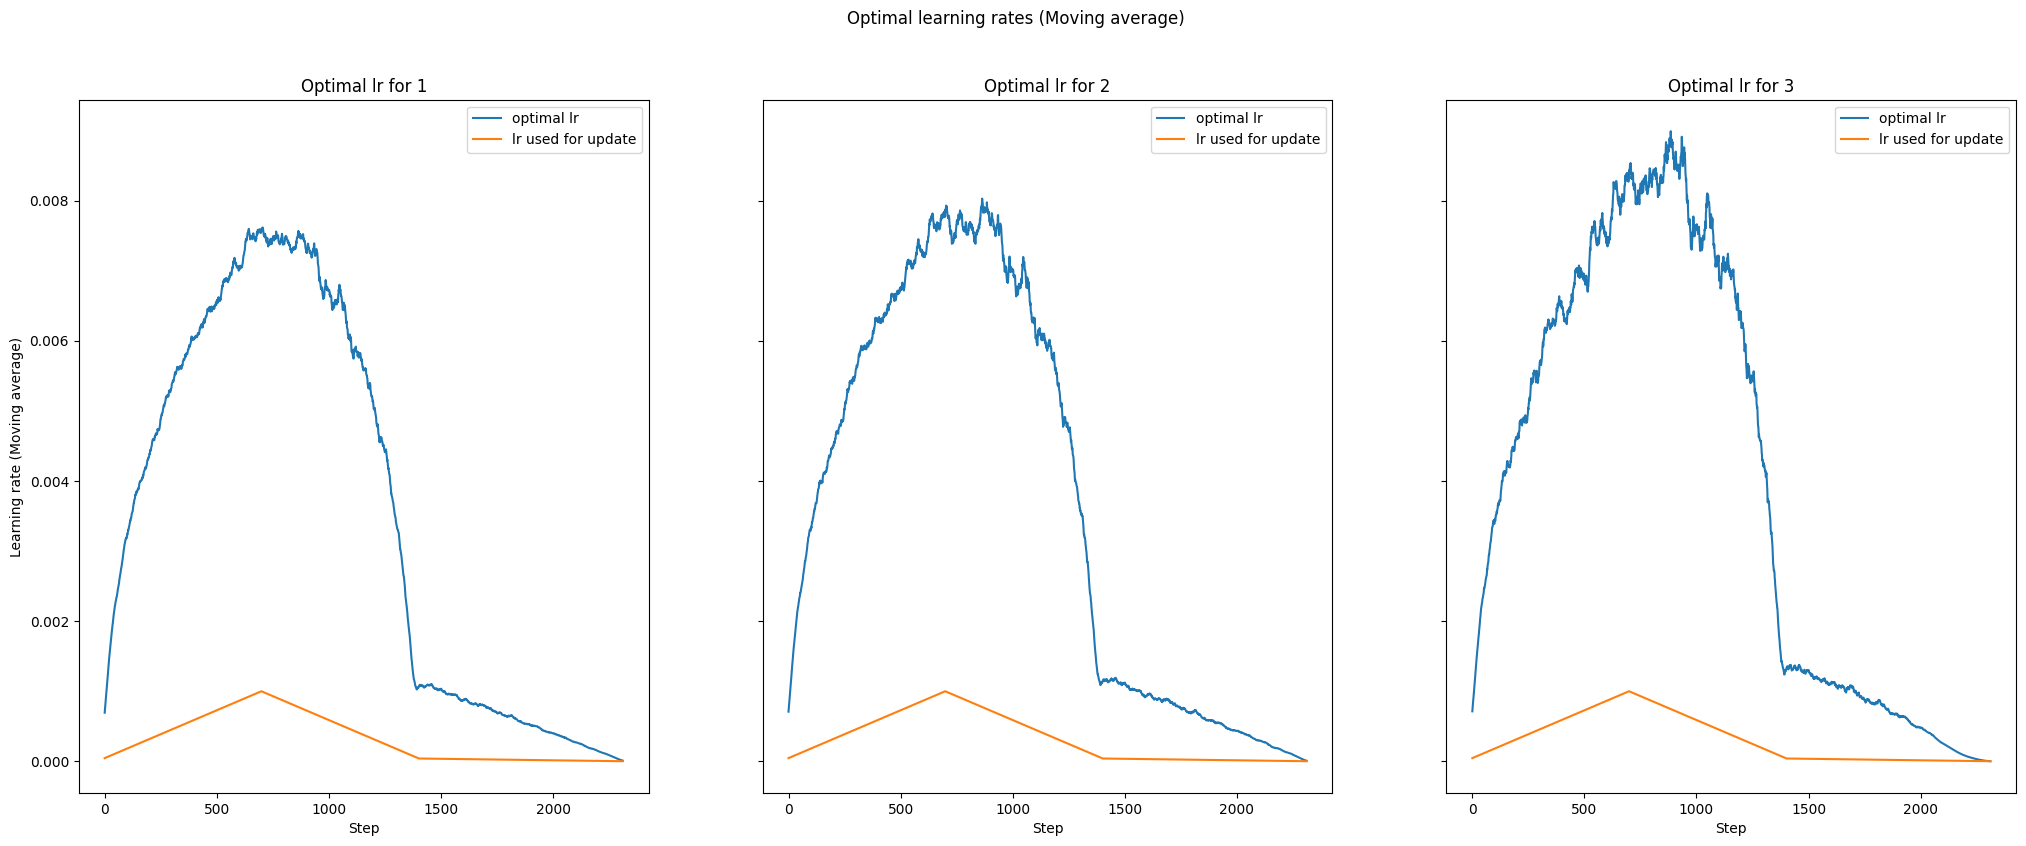

In [29]:
fig, ax = plt.subplots(ncols=len(blocks_indices), figsize=(25, 9), sharey=True)
fig.suptitle("Optimal learning rates (Moving average)")
for idx in blocks_indices:
    plot_idx = idx // 2
    ys = [
        optimal_lr[f"model.{idx}.weight"].item()
        for optimal_lr in results.optimal_lrs
    ]
    ys = [np.mean(ys[i : (i + 30)]) for i in range(len(ys) - 30)]
    sns.lineplot(
        x=list(range(len(ys))), y=ys, ax=ax[plot_idx], label="optimal lr"
    )
    sns.lineplot(
        x=list(range(len(ys))),
        y=results.scheduler_lrs[3:-30],
        ax=ax[plot_idx],
        label="lr used for update",
    )
    ax[plot_idx].set_title(f"Optimal lr for {plot_idx + 1}")
    ax[plot_idx].set_xlabel("Step")
    ax[plot_idx].set_ylabel("Learning rate (Moving average)")